# 1. Importing Modules and Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix



In [2]:
data =pd.read_csv("C:\\Users\\STAR TOP\\.vscode\\ML_elevvo_intership\\Task_1 Student Score Prediction\\StudentPerformanceFactorsData.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
data.shape

(6607, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
data.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

# 2.Exploratory Data Analysis

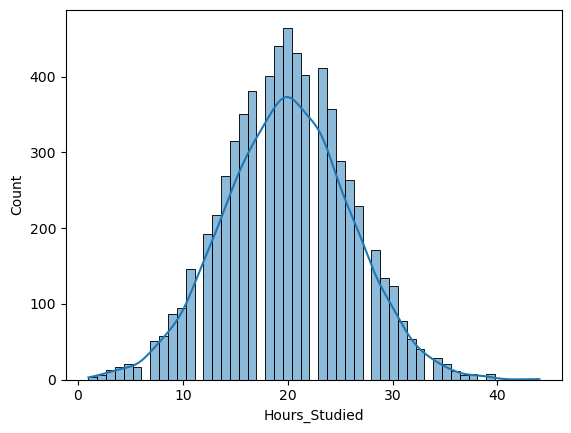

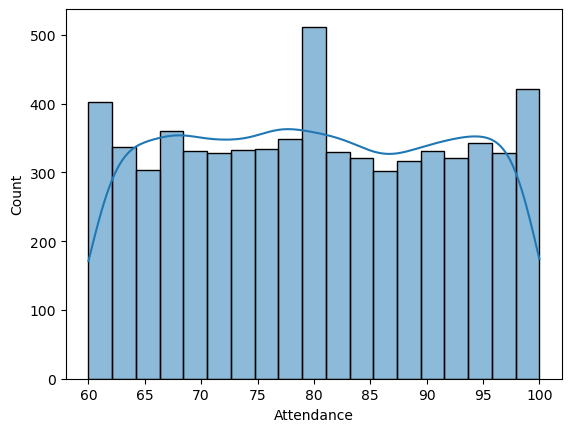

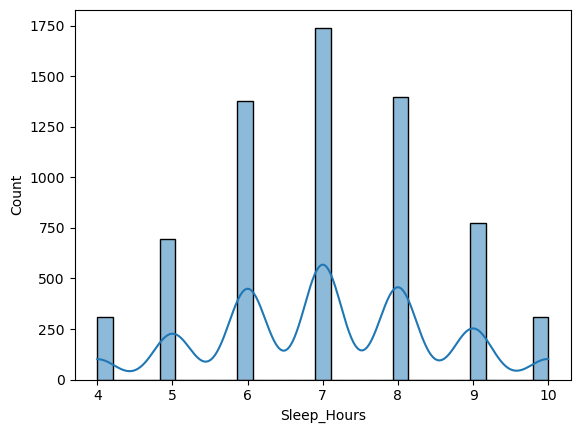

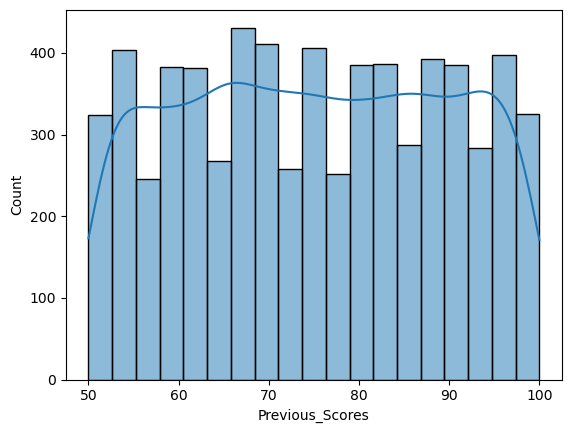

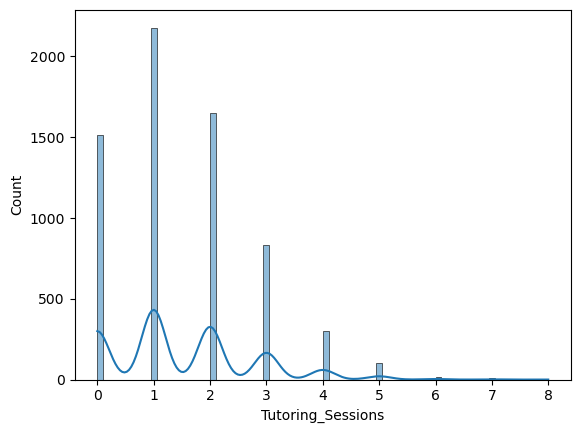

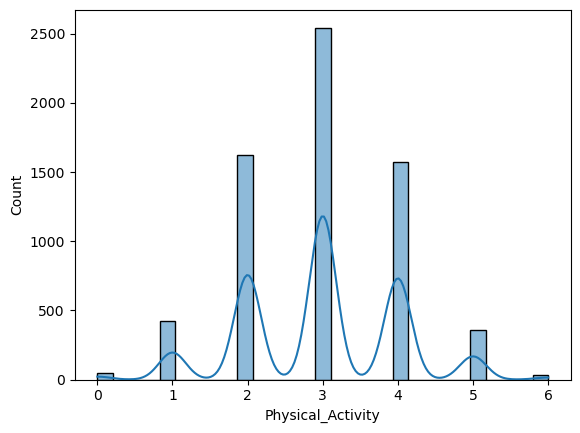

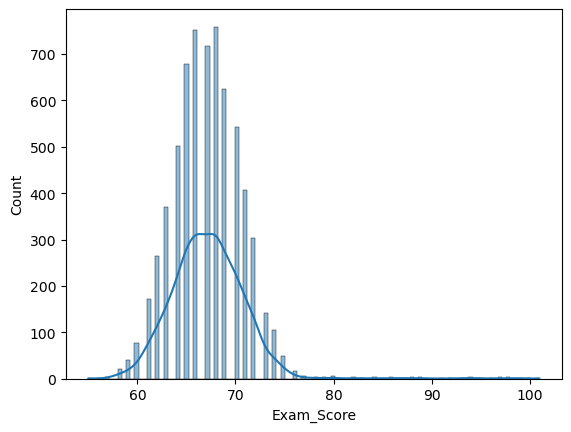

In [6]:
for col in data:
    if data[col].dtype != "O":
        sns.histplot(data[col],kde=True)
        plt.show()

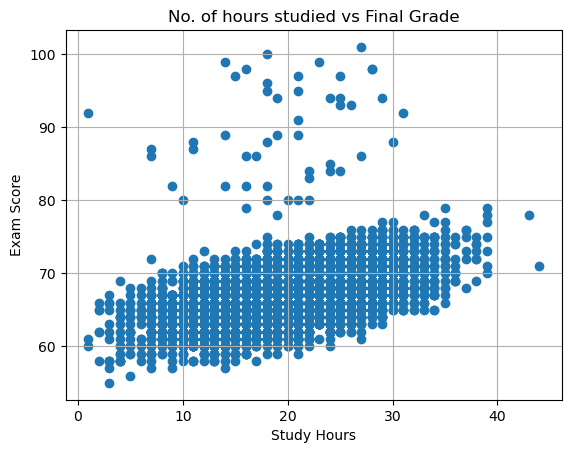

In [7]:
plt.scatter(data["Hours_Studied"],data["Exam_Score"])
plt.title("No. of hours studied vs Final Grade")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.grid(True)

In [8]:
numerical_col = data.select_dtypes(include=['int64', 'float64']).columns


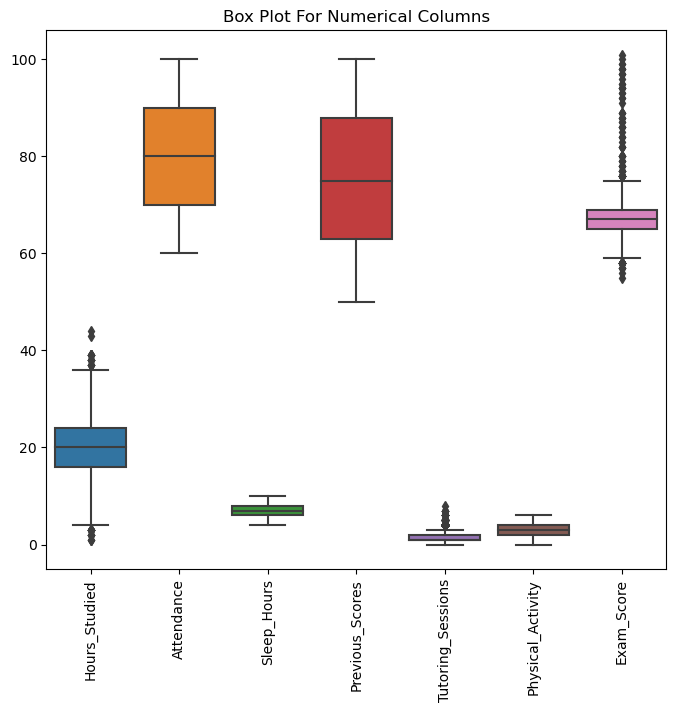

In [9]:
plt.figure(figsize=(8,7))
sns.boxplot(data=data[numerical_col])
plt.xticks(rotation=90)
plt.title("Box Plot For Numerical Columns")
plt.show()


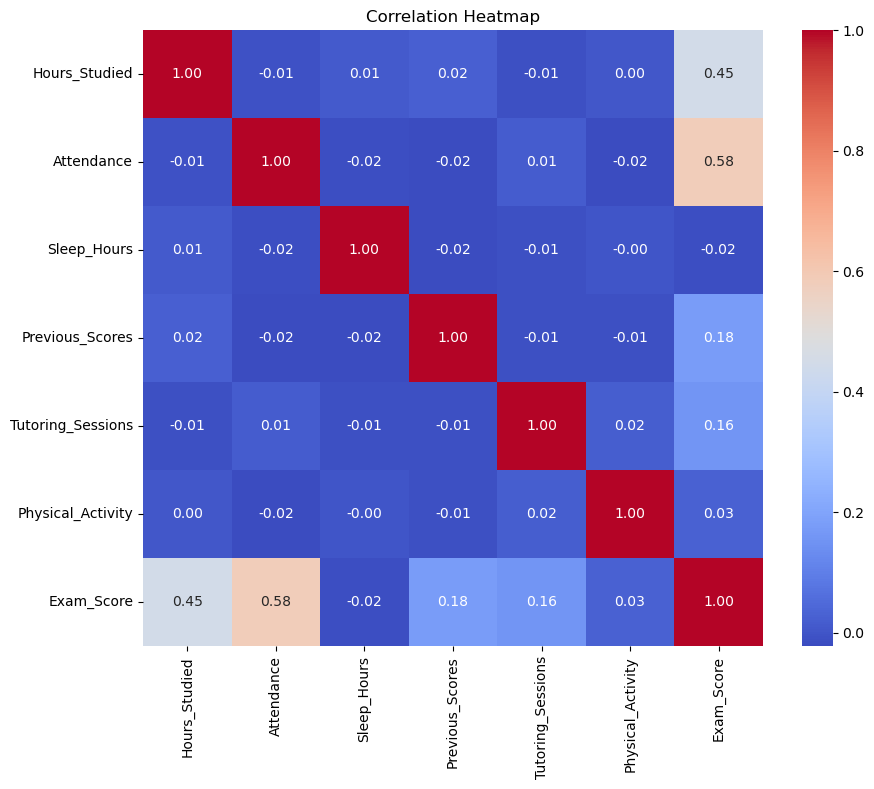

In [10]:
numerical_col = data.select_dtypes(include="number") 
corr_matrix = numerical_col.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 3.Data Preprocessing

### Handle Missing Value

In [11]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [12]:
data["Teacher_Quality"]=data["Teacher_Quality"].fillna(data["Teacher_Quality"].mode()[0]).infer_objects(copy=False)

data["Parental_Education_Level"]=data["Parental_Education_Level"].fillna(data["Parental_Education_Level"].mode()[0]).infer_objects(copy=False)

data["Distance_from_Home"]=data["Distance_from_Home"].fillna(data["Distance_from_Home"].mode()[0]).infer_objects(copy=False)


In [13]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Check Data Duplicated

In [14]:
data.duplicated().sum().any()

False

### Encodeing By Used One-Hot Encoder

In [15]:
categorical_col=[col for col in data.columns if data[col].dtype=="object"]
categorical_col

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

In [16]:
data=pd.get_dummies(data,columns=categorical_col,drop_first=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6607 non-null   int64
 1   Attendance                             6607 non-null   int64
 2   Sleep_Hours                            6607 non-null   int64
 3   Previous_Scores                        6607 non-null   int64
 4   Tutoring_Sessions                      6607 non-null   int64
 5   Physical_Activity                      6607 non-null   int64
 6   Exam_Score                             6607 non-null   int64
 7   Parental_Involvement_Low               6607 non-null   bool 
 8   Parental_Involvement_Medium            6607 non-null   bool 
 9   Access_to_Resources_Low                6607 non-null   bool 
 10  Access_to_Resources_Medium             6607 non-null   bool 
 11  Extracurricular_Activities_Yes

###  Standardize numerical features StandardScaler.

In [18]:
numerical_col = data.select_dtypes(include=['int64', 'float64']).columns

scaler=StandardScaler()
data[numerical_col]=scaler.fit_transform(data[numerical_col])

# 4.Buliding Model

In [19]:
x=data[["Hours_Studied"]]
y=data["Exam_Score"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train

,Hours_Studied
5810,1.172705
1268,-0.663645
414,0.338001
4745,-0.329763
654,2.508233
...,...
3772,-0.830586
5191,0.004119
5226,-0.496704
5390,-0.663645


In [21]:
y_train

5810    0.453539
1268    0.453539
414    -0.317637
4745    1.224715
654     1.224715
          ...   
3772   -0.317637
5191   -0.574696
5226   -1.345872
5390    1.481774
860    -1.345872
Name: Exam_Score, Length: 5285, dtype: float64

In [22]:
x_test

,Hours_Studied
743,0.004119
5551,0.338001
3442,0.171060
6571,-1.331409
4204,0.171060
...,...
4709,0.004119
3664,1.172705
5231,0.504942
1773,0.171060


In [23]:
y_test

743    -0.574696
5551   -0.574696
3442    0.967657
6571   -0.831754
4204   -0.317637
          ...   
4709    0.453539
3664    1.224715
5231   -0.317637
1773   -1.088813
5782    1.224715
Name: Exam_Score, Length: 1322, dtype: float64

In [24]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred=model.predict(x_test)

In [26]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Linear Regression:")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Linear Regression:
MAE: 0.63
R-squared: 0.23


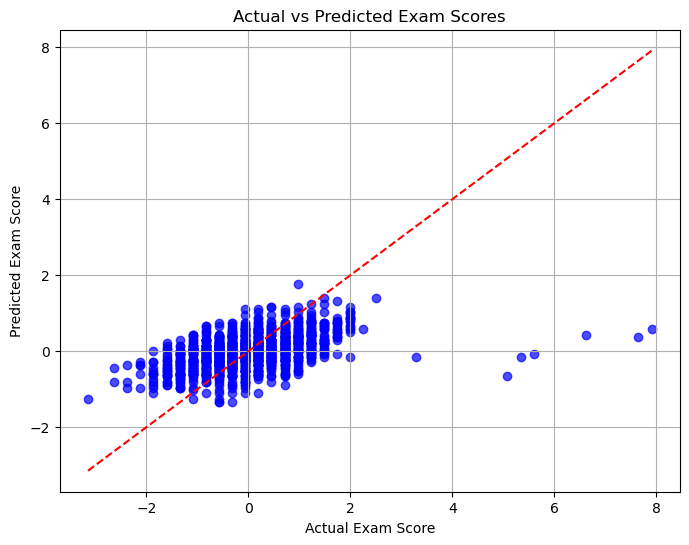

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط مثالي
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.grid(True)
plt.show()


# Bonus:Linear Polynomial Regression


In [28]:
poly_feature=PolynomialFeatures(degree=2,include_bias=False)
x_train_ploy=poly_feature.fit_transform(x_train)
x_test_poly=poly_feature.transform(x_test)

In [29]:
model=LinearRegression()
model.fit(x_train_ploy,y_train)

LinearRegression()

In [30]:
y_pred_2=model.predict(x_test_poly)

In [31]:
mae2=mean_absolute_error(y_test,y_pred_2)
r2_2=r2_score(y_test,y_pred_2)
print("PolynomialRegression")
print(f"MAE: {mae2:.2f}")
print(f"R-squared: {r2_2:.2f}")

PolynomialRegression
MAE: 0.63
R-squared: 0.23


In [32]:
y_train_pred = model.predict(x_train_ploy)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("PolynomialRegression (Training Data):")
print(f"MAE: {mae_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

print("\nPolynomialRegression (Test Data):")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

PolynomialRegression (Training Data):
MAE: 0.65
R-squared: 0.19

PolynomialRegression (Test Data):
MAE: 0.63
R-squared: 0.23


Model Comparison & Selection:

After training both a Linear Regression and a Polynomial Regression model, I compared their performance using MAE and R-squared metrics.

Linear Regression achieved an MAE of 0.12 and R² of 0.77.

Polynomial Regression gave similar results on the test set (MAE = 0.12, R² = 0.77) but slightly worse on the training set.

This suggests that the Linear Regression model is more efficient and generalizes better without adding unnecessary complexity.

Therefore, I selected Linear Regression as the final model.




### Bonus:After Removing Sleep_Hours Column

In [33]:
x2= data.drop(columns=["Exam_Score", "Sleep_Hours"])
y2= data["Exam_Score"]

In [34]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x2_train, y2_train)

y2_pred = model.predict(x2_test)

mae2 = mean_absolute_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print("MAE:", mae2)
print("R²:", r2_2)

MAE: 0.11602974979712218
R²: 0.7698394352703555



After removing the Sleep_Hours feature, the model's performance remained almost unchanged.
The MAE slightly decreased from 0.120 to 0.116, and R² stayed around 0.77.
This suggests that Sleep_Hours has a minimal impact on predicting exam scores and can potentially be excluded from the final model.